## 사이트 주소

    https://datascienceschool.net/view-notebook/2282b75b2a63448087b77269885c27cb/

# Dask 사용법 기초¶

    Pandas 는 데이터베이스나 CSV 파일의 데이터를 모두 메모리로 읽어들인 다음 메모리 위에서 데이터를 처리한다. 하지만 데이터의 양이 많은 경우에는 메모리의 제한으로 데이터프레임을 만들 수 없는 경우가 있다. 또한 데이터프레임의 크기가 너무 크면 질의나 그룹 연산을 할 때 하나의 CPU 코어로 처리하기에는 시간이 너무 많이 걸릴 수도 있다.

    이러한 경우에 도움이 되는 것이 Dask 패키지이다. Dask 패키지는 Pandas 데이터프레임 형식으로 빅데이터를 처리하기 위한 파이썬 패키지로 다음과 같은 두 가지 기능을 가진다.

            가상 데이터프레임
            병렬처리용 작업 스케줄러

In [1]:
import dask.dataframe as dd

In [20]:
dir(dd)

['Aggregation',
 'DataFrame',
 'Index',
 'Series',
 '_Frame',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'accessor',
 'assert_eq',
 'backends',
 'categorical',
 'compute',
 'concat',
 'core',
 'demo',
 'division',
 'extensions',
 'from_array',
 'from_bcolz',
 'from_dask_array',
 'from_delayed',
 'from_pandas',
 'get_dummies',
 'groupby',
 'io',
 'isna',
 'map_partitions',
 'melt',
 'merge',
 'methods',
 'multi',
 'optimize',
 'pivot_table',
 'print_function',
 'read_csv',
 'read_fwf',
 'read_hdf',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_sql_table',
 'read_table',
 'repartition',
 'reshape',
 'rolling',
 'shuffle',
 'to_bag',
 'to_csv',
 'to_datetime',
 'to_hdf',
 'to_json',
 'to_parquet',
 'to_records',
 'to_timedelta',
 'utils']

In [2]:
help(dd.read_csv)

Help on function read_csv in module dask.dataframe.io.csv:

read_csv(urlpath, blocksize=64000000, collection=True, lineterminator=None, compression=None, sample=256000, enforce=False, assume_missing=False, storage_options=None, include_path_column=False, **kwargs)
    Read CSV files into a Dask.DataFrame
    
    This parallelizes the :func:`pandas.read_csv` function in the following ways:
    
    - It supports loading many files at once using globstrings:
    
        >>> df = dd.read_csv('myfiles.*.csv')  # doctest: +SKIP
    
    - In some cases it can break up large files:
    
        >>> df = dd.read_csv('largefile.csv', blocksize=25e6)  # 25MB chunks  # doctest: +SKIP
    
    - It can read CSV files from external resources (e.g. S3, HDFS) by
      providing a URL:
    
        >>> df = dd.read_csv('s3://bucket/myfiles.*.csv')  # doctest: +SKIP
        >>> df = dd.read_csv('hdfs:///myfiles.*.csv')  # doctest: +SKIP
        >>> df = dd.read_csv('hdfs://namenode.example.com/myfil

## dtype에 unicode를 세팅할 것 

In [3]:
df = dd.read_csv("./data/lending_club_A.csv",  sep=',', error_bad_lines=False, dtype='unicode')

### 데이터가 메모리에 없어서 자료가 나오지 않음 

In [4]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### 데이터는 head 메소드가 실행될 때 수행된다

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.9,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1069971,1304884,3600.0,3600.0,3600.0,36 months,6.03,109.57,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,1069742,1304855,9200.0,9200.0,9200.0,36 months,6.03,280.01,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30,1032111,1261745,4375.0,4375.0,4375.0,36 months,7.51,136.11,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,1069539,1304608,31825.0,31825.0,31825.0,36 months,7.9,995.82,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

Unnamed: 0                     object
id                             object
member_id                      object
loan_amnt                      object
funded_amnt                    object
funded_amnt_inv                object
term                           object
int_rate                       object
installment                    object
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                     object
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                            object
delinq_2yrs 

In [7]:
df.loan_amnt = df.loan_amnt.astype('float')

In [21]:
import pandas as pd

In [23]:
df_1 = pd.read_csv("./data/lending_club_A.csv", encoding="utf-8")

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148202 entries, 0 to 148201
Data columns (total 75 columns):
Unnamed: 0                     148202 non-null int64
id                             148202 non-null int64
member_id                      148202 non-null int64
loan_amnt                      148202 non-null float64
funded_amnt                    148202 non-null float64
funded_amnt_inv                148202 non-null float64
term                           148202 non-null object
int_rate                       148202 non-null float64
installment                    148202 non-null float64
grade                          148202 non-null object
sub_grade                      148202 non-null object
emp_title                      139912 non-null object
emp_length                     141250 non-null object
home_ownership                 148202 non-null object
annual_inc                     148198 non-null float64
verification_status            148202 non-null object
issue_d               

### 판다스 계산하기

In [26]:
%timeit df_1.loan_amnt.mean()

161 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 계산은 실제 compute를 실행해야 계산됨 

In [8]:
df.loan_amnt.mean()

dd.Scalar<series-..., dtype=float64>

In [27]:
%timeit df.loan_amnt.mean().compute()

1.56 s ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
df.loan_amnt.mean().compute()

14038.86030552894

In [10]:
df['loan_amnt']

Dask Series Structure:
npartitions=2
    float64
        ...
        ...
Name: loan_amnt, dtype: float64
Dask Name: getitem, 14 tasks

In [11]:
df['loan_amnt'].compute().head()

0     5000.0
1     3600.0
2     9200.0
3     4375.0
4    31825.0
Name: loan_amnt, dtype: float64

## 할당하기 

    이번에는 이 값으로 원래의 temperature 열을 갱신해보자. 
    이 때는 Pandas의 문법을 쓰지 못하고 다음과 같이 assign 메서드를 사용해야 한다. 
    assign 메서드를 사용할 때는 compute를 할 필요가 없다.

In [12]:
df = df.assign(loan_amnt=df.loan_amnt * 1200)

In [13]:
df['loan_amnt'].compute().head()

0     6000000.0
1     4320000.0
2    11040000.0
3     5250000.0
4    38190000.0
Name: loan_amnt, dtype: float64

## Parallel Processing with Dask



In [14]:
from dask import delayed, compute
import dask

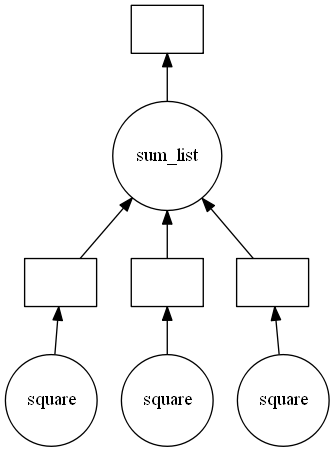

In [15]:
@delayed
def square(num):
    print("square fn:", num)
    print()
    return num * num

@delayed
def sum_list(args):
    print("sum_list fn:", args)
    return sum(args)

items = [1, 2, 3]

computation_graph = sum_list([square(i) for i in items])

computation_graph.visualize()


In [16]:
## !pip install graphviz -U

In [17]:
computation_graph.compute()

square fn:square fn: 1

square fn: 2

 3

sum_list fn: [1, 4, 9]


14

In [18]:
import graphviz 